In [16]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('geocoder_data.csv',index_col=0)

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,url,seller_url,title,squares,full_price,price_per_square,floor,free,...,street,house_number,description,sub_near,highway_near,current_floor,max_floor,address,latitude,longitude
0,0,0,https://spb.cian.ru/sale/commercial/300074346/,https://www.cian.ru/company/83887466/,"Свободное назначение, 131,63 м²",131.63,41000000.0,311480.0,1 из 2,0,...,ул. Восстановления,19,Продажа помещения свободного назначения в бизн...,"[['Проспект Ветеранов', '25 мин.'], ['Ленински...","[['Нарва шоссе', '25 км от КАД'], ['Киевское ш...",1.0,2.0,"Санкт-Петербург, р-н Красносельский, мкр. Крас...",30.082621,59.724677
1,1,1,https://spb.cian.ru/sale/commercial/300073799/,https://spb.cian.ru/company/12477946,"Свободное назначение, 145,1 м²",145.10,37000000.0,254997.0,1 из 5,0,...,7-я Красноармейская ул.,5,"ID 6024 - пoжaлуйстa, coобщитe этот номер мeне...",[],[],1.0,5.0,"Санкт-Петербург, р-н Адмиралтейский, Измайловс...",30.316138,59.911854
2,2,2,https://spb.cian.ru/sale/commercial/300073275/,https://spb.cian.ru/company/59606612,"Свободное назначение, 73,5 м²",73.50,26000000.0,353742.0,1 из 7,0,...,11-я Красноармейская ул.,11,Код объекта: 1053925.\nПродается помещение пло...,"[['Балтийская', '10 мин.'], ['Фрунзенская', '1...",[],1.0,7.0,"Санкт-Петербург, р-н Адмиралтейский, Измайловс...",30.301127,59.912368
3,3,3,https://spb.cian.ru/sale/commercial/300070206/,NaN,"Свободное назначение, 682 м²",682.00,71500000.0,104839.0,1 из 2,0,...,ул. Коммуны,9к1,Новое здание Бизнес-Центра и профессиональный ...,"[['Проспект Большевиков', '9 мин.']]",[],1.0,2.0,"Санкт-Петербург, р-н Красногвардейский, Порохо...",30.506167,59.941687
4,4,5,https://spb.cian.ru/sale/commercial/300069782/,https://spb.cian.ru/company/74333292,"Торговая площадь, 33,9 м²",33.90,6441000.0,190000.0,1 из 9,0,...,ул. Лагоды,5,ВНИМАНИЕ! ЗАКРЫТАЯ ПРОДАЖА - ВСЕ ПОДРОБНОСТИ П...,"[['Ладожская', '6 мин.'], ['Новочеркасская', '...",[],1.0,9.0,"Санкт-Петербург, р-н Красногвардейский, Порохо...",30.449978,59.956836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,1206,1342,https://spb.cian.ru/sale/commercial/295288773/,https://spb.cian.ru/company/28717,"Свободное назначение, 1 555 м²",1555.00,123000000.0,79100.0,3 из 3,0,...,Большая Озерная ул.,70Б,ЗВОНИТЕ! Всегда работаем с агентами и посредни...,"[['Проспект Просвещения', '6 мин.'], ['Удельна...",[],3.0,3.0,"Санкт-Петербург, р-н Выборгский, Шувалово-Озер...",30.302187,60.040204
1207,1207,1343,https://spb.cian.ru/sale/commercial/295288770/,https://spb.cian.ru/company/28717,"Свободное назначение, 1 555 м²",1555.00,132175000.0,85000.0,3 из 3,0,...,Большая Озерная ул.,70Б,"Трехэтажное нежилое здание,возле Суздальских о...","[['Проспект Просвещения', '6 мин.'], ['Удельна...",[],3.0,3.0,"Санкт-Петербург, р-н Выборгский, Шувалово-Озер...",30.302187,60.040204
1208,1208,1344,https://spb.cian.ru/sale/commercial/295280790/,NaN,"Свободное назначение, 45 м²",45.00,3800000.0,84445.0,-1 из 6,0,...,просп. Большой Петроградской стороны,28/1,Подвальное помещение без ремонта на 1ой линии ...,"[['Спортивная', '8 мин.'], ['Чкаловская', '8 м...",[],NaN,NaN,"Санкт-Петербург, р-н Петроградский, Петровский...",30.297156,59.956899
1209,1209,1345,https://spb.cian.ru/sale/commercial/295279637/,NaN,"Арендный бизнес, 274,4 м²",274.40,43000000.0,156706.0,1,1,...,просп. Королева,64к1,"Продается арендный бизнес - помещение, располо...","[['Комендантский проспект', '6 мин.'], ['Удель...",[],1.0,1.0,"Санкт-Петербург, р-н Приморский, Коломяги, про...",30.237427,60.033976


In [7]:
df = df[['price_per_square','squares','full_price','free','current_floor','max_floor','longitude','latitude']]

In [9]:
df.isna().sum()

price_per_square      0
squares              27
full_price            0
free                  0
current_floor       176
max_floor           176
longitude             0
latitude              0
dtype: int64

In [12]:
df = df[df['squares'].notna()]

In [18]:
df = df.replace(np.nan,'1')

In [21]:
df.describe()

,price_per_square,squares,full_price,free,longitude,latitude
count,1.184000e+03,1184.000000,1.184000e+03,1184.000000,1184.000000,1184.000000
mean,3.961422e+05,857.822390,8.491718e+07,0.082770,59.883443,30.288990
std,2.030861e+06,11465.290558,6.821772e+08,0.275651,1.743405,0.887773
min,4.100000e+01,1.000000,1.590000e+04,0.000000,0.000000,0.000000
25%,1.646372e+05,70.000000,1.580188e+07,0.000000,59.894524,30.276567
50%,2.354535e+05,111.000000,2.824230e+07,0.000000,59.936206,30.323315
75%,3.210635e+05,202.325000,4.816250e+07,0.000000,59.985804,30.368992
max,4.300000e+07,275000.000000,2.222240e+10,1.000000,60.121300,30.642972


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='squares', ylabel='Count'>

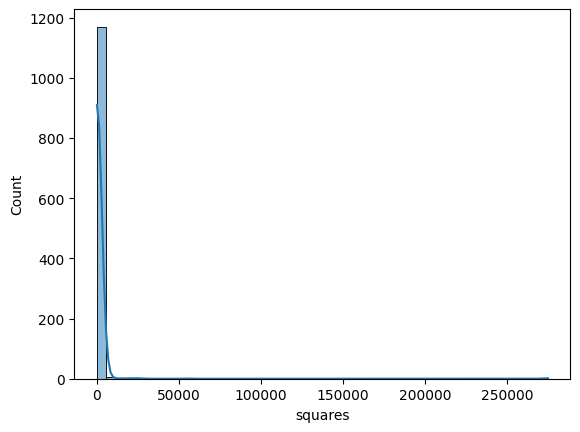

In [24]:
sns.histplot(df['squares'], kde=True,bins = 50)


In [26]:
df.sort_values(by='squares',ascending=False)

,price_per_square,squares,full_price,free,current_floor,max_floor,longitude,latitude
103,41.0,275000.0,1.118700e+07,0,1.0,18.0,59.885142,30.368563
104,46.0,274400.0,1.261966e+07,0,1.0,18.0,59.885142,30.368563
43,45455.0,54354.0,2.470637e+09,0,1.0,4.0,59.837838,29.962058
418,28586.0,26237.0,7.500000e+08,1,1.0,1.0,59.966511,30.375022
415,23112.0,23798.0,5.500000e+08,1,1.0,1.0,59.966511,30.375022
...,...,...,...,...,...,...,...,...
112,33750.0,8.0,2.700000e+05,0,1.0,12.0,59.855331,30.378678
673,291667.0,7.2,2.100000e+06,0,1.0,5.0,59.933068,30.377268
32,136364.0,4.4,6.000000e+05,0,1,1,59.905357,30.342404
123,187500.0,4.0,7.500000e+05,0,1,1,59.895551,30.463461


In [27]:
df[df['price_per_square']<=df['squares']]

,price_per_square,squares,full_price,free,current_floor,max_floor,longitude,latitude
36,10174.0,14744.0,1.500000e+08,0,1.0,1.0,59.698527,30.376747
43,45455.0,54354.0,2.470637e+09,0,1.0,4.0,59.837838,29.962058
103,41.0,275000.0,1.118700e+07,0,1.0,18.0,59.885142,30.368563
104,46.0,274400.0,1.261966e+07,0,1.0,18.0,59.885142,30.368563
415,23112.0,23798.0,5.500000e+08,1,1.0,1.0,59.966511,30.375022


In [29]:
df = df[df['price_per_square']>=df['squares']]

In [33]:
df = df.reset_index()

In [37]:
df = df[['price_per_square','squares','full_price','free','current_floor','max_floor','longitude','latitude']]

<Axes: xlabel='squares', ylabel='Count'>

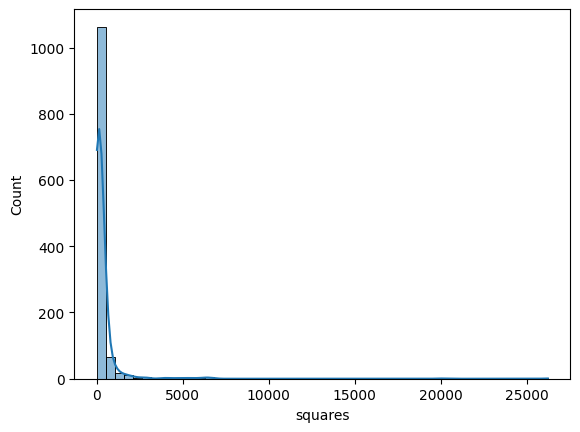

In [39]:
sns.histplot(df['squares'], kde=True,bins = 50)

In [48]:
len(df[df['squares']>=1000])

55

In [49]:
df = df[df['squares']<1000]

<Axes: xlabel='squares', ylabel='Count'>

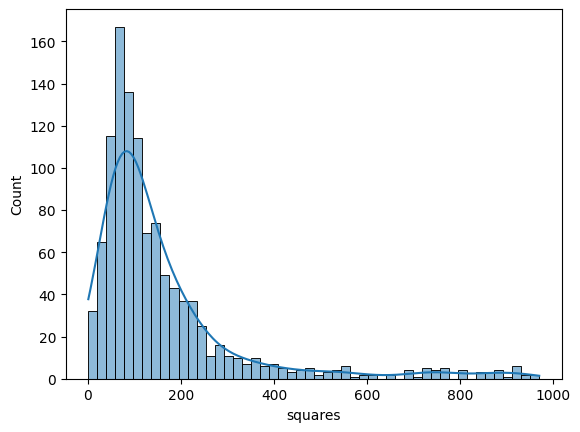

In [51]:
sns.histplot(df['squares'], kde=True,bins = 50)

In [56]:
df = df[['price_per_square','squares','free','current_floor','max_floor','latitude','longitude']]

In [57]:
df.corr()

,price_per_square,squares,free,latitude,longitude
price_per_square,1.000000,0.011695,-0.019977,-0.001162,0.003812
squares,0.011695,1.000000,0.030112,0.005060,0.005999
free,-0.019977,0.030112,1.000000,0.015883,0.006641
latitude,-0.001162,0.005060,0.015883,1.000000,0.992828
longitude,0.003812,0.005999,0.006641,0.992828,1.000000


In [59]:
df = df[df['squares']<=df.squares.quantile(0.95)]

In [66]:
df = df.reset_index(drop='index')

In [67]:
df

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude
0,311480.0,131.63,0,1.0,2.0,30.082621,59.724677
1,254997.0,145.10,0,1.0,5.0,30.316138,59.911854
2,353742.0,73.50,0,1.0,7.0,30.301127,59.912368
3,190000.0,33.90,0,1.0,9.0,30.449978,59.956836
4,166667.0,89.40,0,1.0,5.0,30.325543,59.926372
...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1.0,16.0,30.273171,59.963539
1063,418519.0,81.00,0,1.0,20.0,30.308223,59.904247
1064,91904.0,265.00,0,1.0,21.0,29.953560,60.091011
1065,84445.0,45.00,0,1,1,30.297156,59.956899


In [71]:
metro = pd.read_csv('metro.csv',index_col=0)

In [72]:
metro

,metro,longitude,latitude
0,Санкт-Петербург метро Девяткино,60.050282,30.442674
1,Санкт-Петербург метро Гражданский проспект,60.034829,30.418195
2,Санкт-Петербург метро Академическая,60.012719,30.396133
3,Санкт-Петербург метро Политехническая,60.008815,30.370908
4,Санкт-Петербург метро Площадь Мужества,59.999710,30.366614
...,...,...,...
67,Санкт-Петербург метро Елизаровская,59.896644,30.423774
68,Санкт-Петербург метро Ломоносовская,59.877335,30.441695
69,Санкт-Петербург метро Пролетарская,59.865122,30.470324
70,Санкт-Петербург метро Обухово,59.848796,30.457847


In [74]:
['Devyatkino', 'Grazhdanskii prospekt', 'Akademicheskaya', 'Politekhnicheskaya', 'Ploshchad Muzhestva', 'Lesnaia', 'Vyborgskaia', 'Ploshchad Lenina', 'Chernyshevskaia', 'Ploshchad Vosstaniia', 'Vladimirskaia', 'Pushkinskaia', 'Tekhnologicheskii institut-2', 'Baltiiskaia', 'Narvskaia', 'Kirovskii zavod', 'Avtovo', 'Leninskii prospekt', 'Prospekt Veteranov', 'Parnas', 'Prospekt Prosviashcheniia', 'Ozerki', 'Udelnaia', 'Pionerskaia', 'Chernaia Rechka', 'Petropavlovskaia', 'Gorkovskaia', 'Nevskii prospekt', 'Sennaia ploshchad', 'Tekhnologicheskii institut-1', 'Frunzenskaia', 'Moskovskie vorota', 'Elektrosila', 'Park Pobedy', 'Moskovskaia', 'Zvezdnaia', 'Kupchino', 'Spasskaia', 'Dostoevskaia', 'Ligovskii prospekt', 'Ploshchad Aleksandra Nevskogo-2', 'Novocherkasskaia', 'Ladozhskaia', 'Prospekt Bolshevikov', 'Ulitsa Dybenko', 'Komendantskii prospekt', 'Staraia Derevnia', 'Krestovskii ostrov', 'Chkalovskaia', 'Sportivnaia', 'Admiralteiskaia', 'Sadovaia', 'Zvenigorodskaia', 'Obvodnyi kanal', 'Volkovskaia', 'Bukharestskaia', 'Mezhdunarodnaia', 'Prospekt Slavy', 'Dunaia', 'Shushary', 'Begovaya', 'Zenit', 'Primorskaia', 'Vasileostrovskaia', 'Gostinii dvor', 'Maiakovskaia', 'Ploshchad Aleksandra Nevskogo-1', 'Elizarovskaia', 'Lomonosovskaia', 'Proletarskaia', 'Obukhovo', 'Rybackoe']


72

In [75]:
ls = df.copy()

In [77]:
ls[['Devyatkino', 'Grazhdanskii prospekt', 'Akademicheskaya', 'Politekhnicheskaya', 'Ploshchad Muzhestva', 'Lesnaia', 'Vyborgskaia', 'Ploshchad Lenina', 'Chernyshevskaia', 'Ploshchad Vosstaniia', 'Vladimirskaia', 'Pushkinskaia', 'Tekhnologicheskii institut-2', 'Baltiiskaia', 'Narvskaia', 'Kirovskii zavod', 'Avtovo', 'Leninskii prospekt', 'Prospekt Veteranov', 'Parnas', 'Prospekt Prosviashcheniia', 'Ozerki', 'Udelnaia', 'Pionerskaia', 'Chernaia Rechka', 'Petropavlovskaia', 'Gorkovskaia', 'Nevskii prospekt', 'Sennaia ploshchad', 'Tekhnologicheskii institut-1', 'Frunzenskaia', 'Moskovskie vorota', 'Elektrosila', 'Park Pobedy', 'Moskovskaia', 'Zvezdnaia', 'Kupchino', 'Spasskaia', 'Dostoevskaia', 'Ligovskii prospekt', 'Ploshchad Aleksandra Nevskogo-2', 'Novocherkasskaia', 'Ladozhskaia', 'Prospekt Bolshevikov', 'Ulitsa Dybenko', 'Komendantskii prospekt', 'Staraia Derevnia', 'Krestovskii ostrov', 'Chkalovskaia', 'Sportivnaia', 'Admiralteiskaia', 'Sadovaia', 'Zvenigorodskaia', 'Obvodnyi kanal', 'Volkovskaia', 'Bukharestskaia', 'Mezhdunarodnaia', 'Prospekt Slavy', 'Dunaia', 'Shushary', 'Begovaya', 'Zenit', 'Primorskaia', 'Vasileostrovskaia', 'Gostinii dvor', 'Maiakovskaia', 'Ploshchad Aleksandra Nevskogo-1', 'Elizarovskaia', 'Lomonosovskaia', 'Proletarskaia', 'Obukhovo', 'Rybackoe']] = 0.0

In [78]:
ls

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Primorskaia,Vasileostrovskaia,Gostinii dvor,Maiakovskaia,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe
0,311480.0,131.63,0,1.0,2.0,30.082621,59.724677,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,254997.0,145.10,0,1.0,5.0,30.316138,59.911854,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,353742.0,73.50,0,1.0,7.0,30.301127,59.912368,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,190000.0,33.90,0,1.0,9.0,30.449978,59.956836,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,166667.0,89.40,0,1.0,5.0,30.325543,59.926372,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1.0,16.0,30.273171,59.963539,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1063,418519.0,81.00,0,1.0,20.0,30.308223,59.904247,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,91904.0,265.00,0,1.0,21.0,29.953560,60.091011,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1065,84445.0,45.00,0,1,1,30.297156,59.956899,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
metro.tail(50)

,metro,longitude,latitude
22,Санкт-Петербург метро Удельная,60.016681,30.315617
23,Санкт-Петербург метро Пионерская,60.002517,30.296671
24,Санкт-Петербург метро Черная Речка,59.985521,30.300830
25,Санкт-Петербург метро Петроградская,59.966399,30.311511
26,Санкт-Петербург метро Горьковская,59.956147,30.318833
27,Санкт-Петербург метро Невский проспект,59.935435,30.327277
28,Санкт-Петербург метро Сенная площадь,59.927125,30.320548
29,Санкт-Петербург метро Технологический институт-1,59.916342,30.318554
30,Санкт-Петербург метро Фрунзенская,59.906179,30.317530
31,Санкт-Петербург метро Московские ворота,59.892098,30.317961


In [80]:
subs = ['Devyatkino', 'Grazhdanskii prospekt', 'Akademicheskaya', 'Politekhnicheskaya', 'Ploshchad Muzhestva', 'Lesnaia', 'Vyborgskaia', 'Ploshchad Lenina', 'Chernyshevskaia', 'Ploshchad Vosstaniia', 'Vladimirskaia', 'Pushkinskaia', 'Tekhnologicheskii institut-2', 'Baltiiskaia', 'Narvskaia', 'Kirovskii zavod', 'Avtovo', 'Leninskii prospekt', 'Prospekt Veteranov', 'Parnas', 'Prospekt Prosviashcheniia', 'Ozerki', 'Udelnaia', 'Pionerskaia', 'Chernaia Rechka', 'Petropavlovskaia', 'Gorkovskaia', 'Nevskii prospekt', 'Sennaia ploshchad', 'Tekhnologicheskii institut-1', 'Frunzenskaia', 'Moskovskie vorota', 'Elektrosila', 'Park Pobedy', 'Moskovskaia', 'Zvezdnaia', 'Kupchino', 'Spasskaia', 'Dostoevskaia', 'Ligovskii prospekt', 'Ploshchad Aleksandra Nevskogo-2', 'Novocherkasskaia', 'Ladozhskaia', 'Prospekt Bolshevikov', 'Ulitsa Dybenko', 'Komendantskii prospekt', 'Staraia Derevnia', 'Krestovskii ostrov', 'Chkalovskaia', 'Sportivnaia', 'Admiralteiskaia', 'Sadovaia', 'Zvenigorodskaia', 'Obvodnyi kanal', 'Volkovskaia', 'Bukharestskaia', 'Mezhdunarodnaia', 'Prospekt Slavy', 'Dunaia', 'Shushary', 'Begovaya', 'Zenit', 'Primorskaia', 'Vasileostrovskaia', 'Gostinii dvor', 'Maiakovskaia', 'Ploshchad Aleksandra Nevskogo-1', 'Elizarovskaia', 'Lomonosovskaia', 'Proletarskaia', 'Obukhovo', 'Rybackoe']

In [ ]:
for i in subs:
    df[f'{i}'] = 

In [82]:
import math as m

In [94]:
s = 111.2 * m.acos((m.sin(metro.iat[0,2]) * m.sin(metro.iat[1,2]) + (m.cos(metro.iat[0,2]) * m.cos(metro.iat[1,2]) * m.cos(metro.iat[1,1] - metro.iat[0,1]) )))

In [95]:
s

2.8827906294142496

In [ ]:
S = 111,2×arccos(sin φ1 × sin φ2 + cos φ1 × cos φ2 × cos (L2-L1))

In [84]:
metro.iat[0,1]

60.050282

In [109]:
for i in range(7,79):
    for r in range(0,1067):
        ls.iat[r,i] = round(111.2 * m.acos((m.sin(ls.iat[r,5]) * m.sin(metro.iat[(i-7),2]) + (m.cos(ls.iat[r,5]) * m.cos(metro.iat[(i-7),2]) * m.cos(ls.iat[r,6] - metro.iat[(i-7),1] ) ))),2)

In [98]:
ls.iat[0,5]

30.082621

In [110]:
ls

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Primorskaia,Vasileostrovskaia,Gostinii dvor,Maiakovskaia,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe
0,311480.0,131.63,0,1.0,2.0,30.082621,59.724677,42.18,39.32,36.65,...,18.47,23.05,28.88,31.32,34.54,38.56,40.41,43.51,42.04,46.67
1,254997.0,145.10,0,1.0,5.0,30.316138,59.911854,16.08,13.22,10.44,...,9.22,4.47,2.17,4.47,7.71,12.00,14.10,17.35,16.16,21.02
2,353742.0,73.50,0,1.0,7.0,30.301127,59.912368,17.50,14.62,11.85,...,7.58,2.92,3.68,6.10,9.38,13.67,15.75,19.00,17.79,22.65
3,190000.0,33.90,0,1.0,9.0,30.449978,59.956836,5.93,5.97,6.88,...,23.95,19.11,13.10,10.63,7.46,4.74,5.08,6.30,6.92,9.97
4,166667.0,89.40,0,1.0,5.0,30.325543,59.926372,14.80,11.94,9.16,...,10.16,5.32,0.90,3.32,6.64,11.05,13.21,16.49,15.37,20.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1.0,16.0,30.273171,59.963539,19.42,16.56,13.91,...,4.34,1.13,6.78,9.28,12.63,17.12,19.31,22.58,21.47,26.33
1063,418519.0,81.00,0,1.0,20.0,30.308223,59.904247,17.03,14.17,11.38,...,8.43,3.81,3.12,5.42,8.63,12.86,14.92,18.16,16.93,21.78
1064,91904.0,265.00,0,1.0,21.0,29.953560,60.091011,54.40,51.69,49.26,...,31.42,36.28,42.35,44.87,48.21,52.56,54.61,57.83,56.49,61.27
1065,84445.0,45.00,0,1,1,30.297156,59.956899,16.98,14.11,11.40,...,6.97,2.21,4.12,6.60,9.95,14.46,16.66,19.94,18.86,23.73


In [111]:
ls.corr()

,price_per_square,squares,free,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,Politekhnicheskaya,Ploshchad Muzhestva,...,Primorskaia,Vasileostrovskaia,Gostinii dvor,Maiakovskaia,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe
price_per_square,1.000000,0.052140,-0.018886,-0.000792,0.003991,0.014165,0.011172,0.008147,0.000694,0.000046,...,-0.050403,-0.037869,-0.008639,0.002325,0.012321,0.020853,0.023307,0.025552,0.024707,0.026943
squares,0.052140,1.000000,-0.015320,-0.012164,-0.000450,0.049945,0.047603,0.046361,0.040549,0.041086,...,-0.009389,0.002667,0.041668,0.054312,0.060032,0.065489,0.068231,0.068531,0.069551,0.069675
free,-0.018886,-0.015320,1.000000,0.014929,0.006315,0.015969,0.023018,0.030274,0.041307,0.041767,...,0.061372,0.058593,0.041730,0.034509,0.024599,0.007565,-0.002213,-0.010879,-0.008356,-0.020502
latitude,-0.000792,-0.012164,0.014929,1.000000,0.993081,-0.652066,-0.656081,-0.658276,-0.662329,-0.663007,...,-0.590593,-0.635225,-0.662773,-0.663860,-0.661295,-0.649405,-0.644154,-0.638382,-0.644960,-0.638284
longitude,0.003991,-0.000450,0.006315,0.993081,1.000000,-0.585040,-0.593578,-0.600455,-0.614624,-0.616245,...,-0.622149,-0.639387,-0.628024,-0.615209,-0.597968,-0.572509,-0.563094,-0.553488,-0.561119,-0.550363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Elizarovskaia,0.020853,0.065489,0.007565,-0.649405,-0.572509,0.971313,0.966987,0.958136,0.923595,0.920122,...,0.366541,0.591614,0.847637,0.919366,0.977119,1.000000,0.996989,0.988101,0.991684,0.976745
Lomonosovskaia,0.023307,0.068231,-0.002213,-0.644154,-0.563094,0.962358,0.952893,0.938846,0.896800,0.892390,...,0.323333,0.549267,0.813646,0.891524,0.959448,0.996989,1.000000,0.996463,0.998308,0.988860
Proletarskaia,0.025552,0.068531,-0.010879,-0.638382,-0.553488,0.954194,0.939286,0.919671,0.870374,0.864718,...,0.277771,0.504750,0.777189,0.860888,0.938064,0.988101,0.996463,1.000000,0.998936,0.997297
Obukhovo,0.024707,0.069551,-0.008356,-0.644960,-0.561119,0.951906,0.939534,0.922938,0.877367,0.872770,...,0.301446,0.526836,0.793943,0.874231,0.946643,0.991684,0.998308,0.998936,1.000000,0.995154


In [122]:
ls['metro_1km'] = 0
ls['metro_5km'] = 0
ls['metro_10km'] = 0

In [123]:
for i in range(7,79):
    for r in range(0,1067):
        if ls.iat[r,i]<=1.0:
            ls.iat[r,-3] += 1
            ls.iat[r,-2] += 1
            ls.iat[r,-1] += 1
        elif ls.iat[r,i]<=5.0:
            ls.iat[r,-2] += 1
            ls.iat[r,-1] += 1        
        elif ls.iat[r,i]<=10.0:
            ls.iat[r,-1] += 1    

In [124]:
ls

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Maiakovskaia,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km
0,311480.0,131.63,0,1.0,2.0,30.082621,59.724677,42.18,39.32,36.65,...,31.32,34.54,38.56,40.41,43.51,42.04,46.67,0,0,0
1,254997.0,145.10,0,1.0,5.0,30.316138,59.911854,16.08,13.22,10.44,...,4.47,7.71,12.00,14.10,17.35,16.16,21.02,6,33,56
2,353742.0,73.50,0,1.0,7.0,30.301127,59.912368,17.50,14.62,11.85,...,6.10,9.38,13.67,15.75,19.00,17.79,22.65,1,27,55
3,190000.0,33.90,0,1.0,9.0,30.449978,59.956836,5.93,5.97,6.88,...,10.63,7.46,4.74,5.08,6.30,6.92,9.97,0,5,21
4,166667.0,89.40,0,1.0,5.0,30.325543,59.926372,14.80,11.94,9.16,...,3.32,6.64,11.05,13.21,16.49,15.37,20.24,8,34,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1.0,16.0,30.273171,59.963539,19.42,16.56,13.91,...,9.28,12.63,17.12,19.31,22.58,21.47,26.33,0,15,48
1063,418519.0,81.00,0,1.0,20.0,30.308223,59.904247,17.03,14.17,11.38,...,5.42,8.63,12.86,14.92,18.16,16.93,21.78,1,27,55
1064,91904.0,265.00,0,1.0,21.0,29.953560,60.091011,54.40,51.69,49.26,...,44.87,48.21,52.56,54.61,57.83,56.49,61.27,0,0,0
1065,84445.0,45.00,0,1,1,30.297156,59.956899,16.98,14.11,11.40,...,6.60,9.95,14.46,16.66,19.94,18.86,23.73,1,27,54


In [125]:
ls.corr()

,price_per_square,squares,free,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,Politekhnicheskaya,Ploshchad Muzhestva,...,Maiakovskaia,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km
price_per_square,1.000000,0.052140,-0.018886,-0.000792,0.003991,0.014165,0.011172,0.008147,0.000694,0.000046,...,0.002325,0.012321,0.020853,0.023307,0.025552,0.024707,0.026943,0.013689,0.005268,0.009159
squares,0.052140,1.000000,-0.015320,-0.012164,-0.000450,0.049945,0.047603,0.046361,0.040549,0.041086,...,0.054312,0.060032,0.065489,0.068231,0.068531,0.069551,0.069675,-0.065107,-0.053169,-0.002238
free,-0.018886,-0.015320,1.000000,0.014929,0.006315,0.015969,0.023018,0.030274,0.041307,0.041767,...,0.034509,0.024599,0.007565,-0.002213,-0.010879,-0.008356,-0.020502,0.065908,-0.010652,-0.061724
latitude,-0.000792,-0.012164,0.014929,1.000000,0.993081,-0.652066,-0.656081,-0.658276,-0.662329,-0.663007,...,-0.663860,-0.661295,-0.649405,-0.644154,-0.638382,-0.644960,-0.638284,0.031839,0.061343,0.103859
longitude,0.003991,-0.000450,0.006315,0.993081,1.000000,-0.585040,-0.593578,-0.600455,-0.614624,-0.616245,...,-0.615209,-0.597968,-0.572509,-0.563094,-0.553488,-0.561119,-0.550363,0.017566,0.044681,0.075454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Obukhovo,0.024707,0.069551,-0.008356,-0.644960,-0.561119,0.951906,0.939534,0.922938,0.877367,0.872770,...,0.874231,0.946643,0.991684,0.998308,0.998936,1.000000,0.995154,-0.171507,-0.277604,-0.438212
Rybackoe,0.026943,0.069675,-0.020502,-0.638284,-0.550363,0.939039,0.920900,0.898481,0.845517,0.839581,...,0.837452,0.919162,0.976745,0.988860,0.997297,0.995154,1.000000,-0.152498,-0.240635,-0.391289
metro_1km,0.013689,-0.065107,0.065908,0.031839,0.017566,-0.163950,-0.180193,-0.202534,-0.228656,-0.239993,...,-0.304888,-0.250047,-0.196313,-0.180111,-0.162505,-0.171507,-0.152498,1.000000,0.611315,0.459128
metro_5km,0.005268,-0.053169,-0.010652,0.061343,0.044681,-0.310257,-0.344572,-0.387464,-0.445905,-0.463561,...,-0.532875,-0.438721,-0.331273,-0.297081,-0.262437,-0.277604,-0.240635,0.611315,1.000000,0.853094


In [134]:
ls['current_floor'] = ls['current_floor'].astype(int)
ls['max_floor'] = ls['max_floor'].astype(int)

In [136]:
ls.corr()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Maiakovskaia,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km
price_per_square,1.000000,0.052140,-0.018886,-0.022522,0.010610,-0.000792,0.003991,0.014165,0.011172,0.008147,...,0.002325,0.012321,0.020853,0.023307,0.025552,0.024707,0.026943,0.013689,0.005268,0.009159
squares,0.052140,1.000000,-0.015320,0.007807,-0.101305,-0.012164,-0.000450,0.049945,0.047603,0.046361,...,0.054312,0.060032,0.065489,0.068231,0.068531,0.069551,0.069675,-0.065107,-0.053169,-0.002238
free,-0.018886,-0.015320,1.000000,0.009430,-0.021755,0.014929,0.006315,0.015969,0.023018,0.030274,...,0.034509,0.024599,0.007565,-0.002213,-0.010879,-0.008356,-0.020502,0.065908,-0.010652,-0.061724
current_floor,-0.022522,0.007807,0.009430,1.000000,-0.018735,0.012096,0.008674,-0.041426,-0.042110,-0.041182,...,-0.013364,-0.023608,-0.026186,-0.024197,-0.024252,-0.022049,-0.023304,-0.037145,-0.062464,0.009030
max_floor,0.010610,-0.101305,-0.021755,-0.018735,1.000000,-0.060983,-0.058026,0.032888,0.045337,0.061326,...,0.110689,0.090921,0.063219,0.054587,0.045498,0.050914,0.042108,-0.232758,-0.311802,-0.249562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Obukhovo,0.024707,0.069551,-0.008356,-0.022049,0.050914,-0.644960,-0.561119,0.951906,0.939534,0.922938,...,0.874231,0.946643,0.991684,0.998308,0.998936,1.000000,0.995154,-0.171507,-0.277604,-0.438212
Rybackoe,0.026943,0.069675,-0.020502,-0.023304,0.042108,-0.638284,-0.550363,0.939039,0.920900,0.898481,...,0.837452,0.919162,0.976745,0.988860,0.997297,0.995154,1.000000,-0.152498,-0.240635,-0.391289
metro_1km,0.013689,-0.065107,0.065908,-0.037145,-0.232758,0.031839,0.017566,-0.163950,-0.180193,-0.202534,...,-0.304888,-0.250047,-0.196313,-0.180111,-0.162505,-0.171507,-0.152498,1.000000,0.611315,0.459128
metro_5km,0.005268,-0.053169,-0.010652,-0.062464,-0.311802,0.061343,0.044681,-0.310257,-0.344572,-0.387464,...,-0.532875,-0.438721,-0.331273,-0.297081,-0.262437,-0.277604,-0.240635,0.611315,1.000000,0.853094


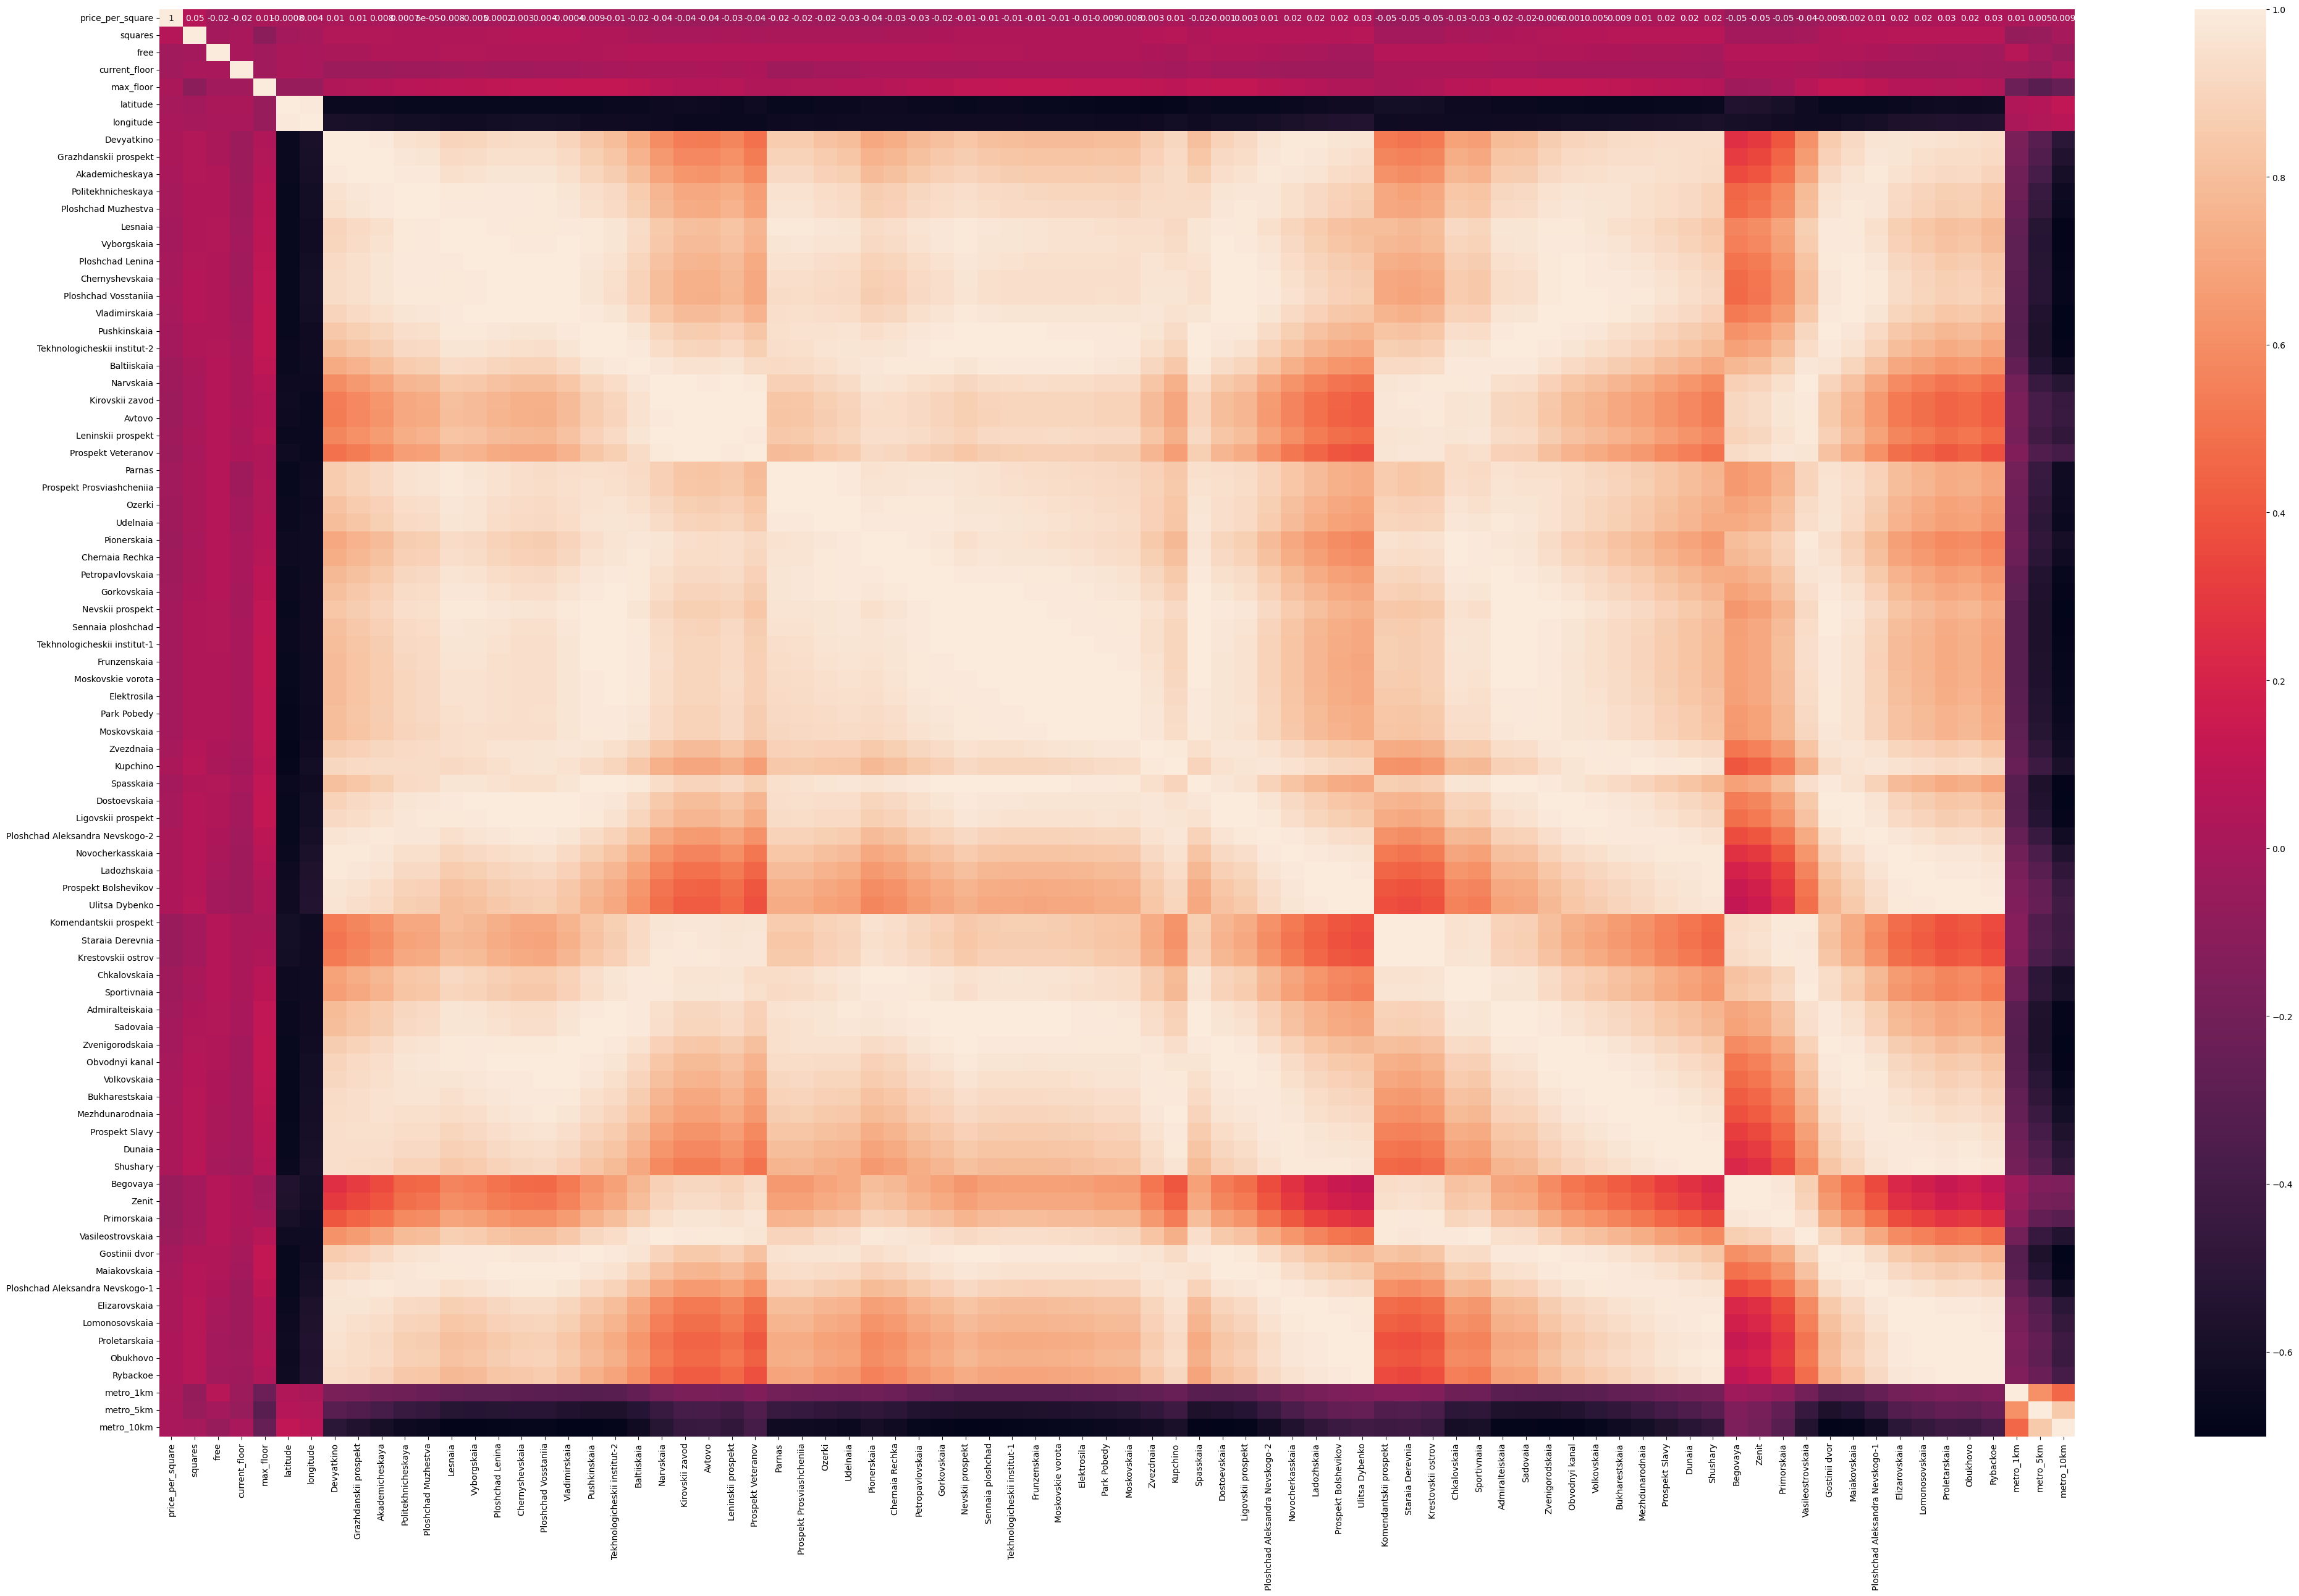

In [140]:
plt.figure(figsize=(50, 30))
sns.heatmap(ls.corr(),annot = True, fmt='.1g')
plt.show()

In [144]:
correlation = ls.corr()['price_per_square']

In [147]:
correlation.reset_index()

,index,price_per_square
0,price_per_square,1.000000
1,squares,0.052140
2,free,-0.018886
3,current_floor,-0.022522
4,max_floor,0.010610
...,...,...
77,Obukhovo,0.024707
78,Rybackoe,0.026943
79,metro_1km,0.013689
80,metro_5km,0.005268


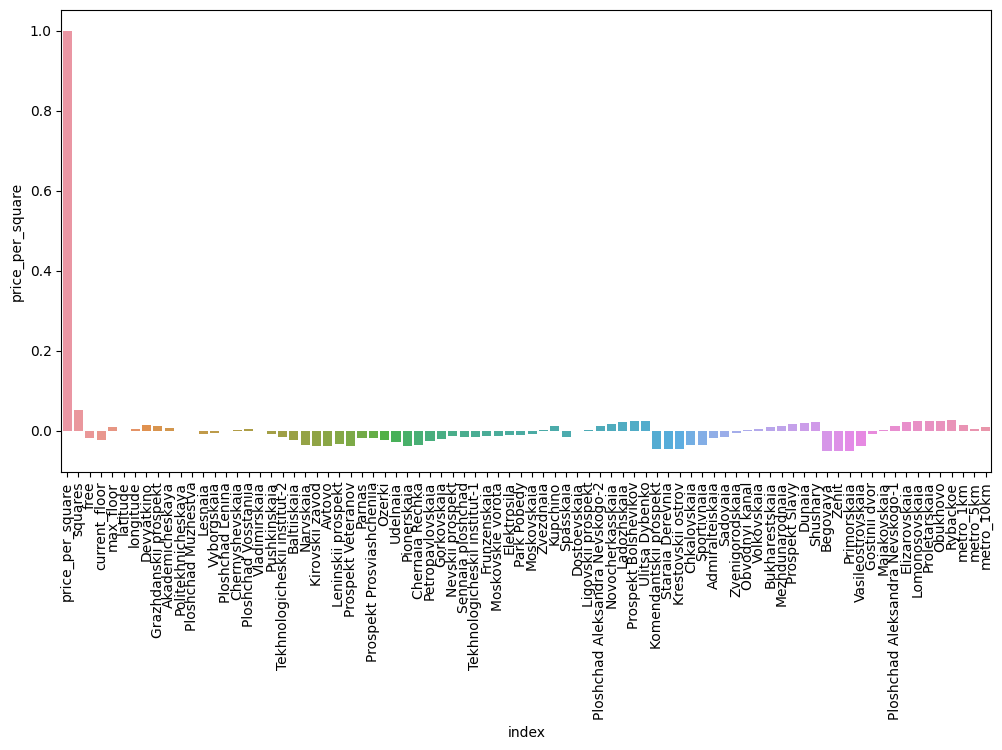

In [150]:
plt.figure(figsize=(12, 6))
sns.barplot(x='index',y='price_per_square',data = correlation.reset_index())
plt.xticks(rotation=90)
plt.show()

In [151]:
ls.to_csv('ready_data.csv', encoding='utf-8')